Nour Mansour and Juan Estrella

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

Part 1: Data Collection

Step 1: Get the tsv data

In [3]:
# Data is saved in the same folder as the project. Then read data from tsv file
data = pd.read_csv("train-balanced-sarcasm.csv")
data.dropna()
data.drop(['author', 'score', 'ups', 'downs', 'date', 'created_utc'], axis = 1, inplace = True)
data.head()

,label,comment,subreddit,parent_comment
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...


Part 2: Data Processing

Step 1: Columns required: Label, Comments, subreddit, parent comment

Step 2: Create a Dataframe containing an even amount of sarcastic and non sarcastic 
comments, amount of data is 505413 each. 

In [4]:
#Copy the only the data we need
#required_data = data[['label','comment','subreddit','parent_comment']]
#required_data.head()

Part 3: Exploratory Analysis & Data Visualization

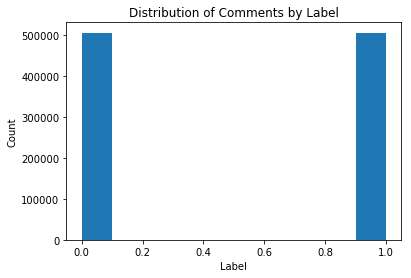

In [5]:
# Explore distribution of the data by label (0 -> non-sarcastic, 1 -> sarcastic)
plt.hist(data.label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Comments by Label')
plt.show()

In [6]:
# Explore distribution of comments by label 
data.groupby('label').describe()

comment                               subreddit                    \
        count  unique             top  freq     count unique        top   
label                                                                     
0      505405  479850             Yes   406    505413  12836  AskReddit   
1      505368  486357  You forgot the  1451    505413   8995  AskReddit   

             parent_comment                       
        freq          count  unique     top freq  
label                                             
0      39310         505413  495461  me irl  228  
1      26367         505413  495337    Why?  148

In [11]:
#Import NLTK library
!pip install nltk

     |████████████████████████████████| 1.5MB 2.5MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/41/c8/31/48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk


In [7]:
import nltk

In [8]:
#nltk.download("all")

In [9]:
from nltk.corpus import stopwords #Use this to get rid off meaningless words like "the, and, a"
from nltk.tokenize import word_tokenize #Split by word
from nltk.tokenize import sent_tokenize #Split by sentence

In [10]:
#Make sure all the comment column is str data type
data['comment'] = data['comment'].astype(str)
data['comment'] = data['comment'].astype(str)
#Divide the required data set to sarcastic and non sarcastic
#non_sarcastic = required_data.loc[required_data['label'] == 0]
#sarcastic = required_data.loc[required_data['label'] == 1]

#drop rows with na values on the comment column
#non_sarcastic['comment'].dropna(inplace=True)
#sarcastic['comment'].dropna(inplace=True)

#Make sure all the comment column is str data type
#non_sarcastic['comment'] = non_sarcastic['comment'].astype(str)
#sarcastic['comment'] = sarcastic['comment'].astype(str)
#print(len(non_sarcastic), len(sarcastic))

In [11]:
data['tokenized_by_sent'] = data['comment'].apply(sent_tokenize)
data['tokenized_by_word'] = data['comment'].apply(word_tokenize)
#word = word_tokenize(sarcastic['comment'].iloc[56269])
#word
#note to nour, so when i try to do the first line of code it shows that index 56269 has an error but when i try to 
#individually tokenized that index, it works. Not sure how to fix this.

# note to Juan: Fixed by making dropna function is working correctly

In [12]:
data.head()

,label,comment,subreddit,parent_comment,tokenized_by_sent,tokenized_by_word
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ...",[NC and NH.],"[NC, and, NH, .]"
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...,[You do know west teams play against west team...,"[You, do, know, west, teams, play, against, we..."
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.,"[They were underdogs earlier today, but since ...","[They, were, underdogs, earlier, today, ,, but..."
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,"[This meme isn't funny none of the ""new york n...","[This, meme, is, n't, funny, none, of, the, ``..."
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...,[I could use one of those tools.],"[I, could, use, one, of, those, tools, .]"
